In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

data = pd.read_csv('flipkart_data.csv')
data.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [ ]:
# unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2])

<Axes: xlabel='rating', ylabel='count'>

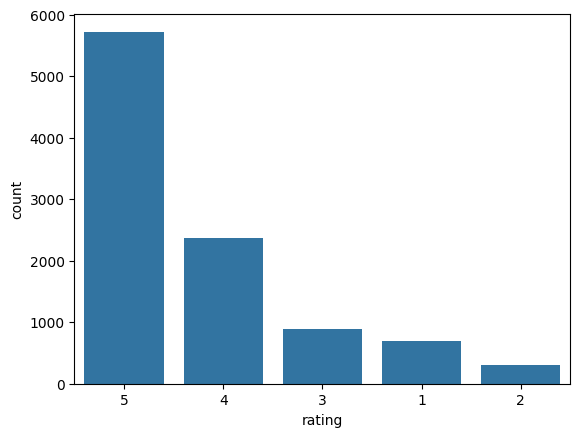

In [ ]:
sns.countplot(data=data,
			x='rating',
			order=data.rating.value_counts().index)



In [ ]:

# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
	if data['rating'][i] >= 5:
		pos_neg.append(1)
	else:
		pos_neg.append(0)

data['label'] = pos_neg



In [ ]:
from tqdm import tqdm


def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		# Removing punctuations
		sentence = re.sub(r'[^\w\s]', '', sentence)

		# Converting lowercase and removing stopwords
		preprocessed_text.append(' '.join(token.lower()
										for token in nltk.word_tokenize(sentence)
										if token.lower() not in stopwords.words('english')))

	return preprocessed_text

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
processed_review = preprocess_text(data['review'].values)
data['review'] = processed_review

100%|██████████| 9976/9976 [00:21<00:00, 456.04it/s]


In [ ]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


In [ ]:
data["label"].value_counts()

label
1    5726
0    4250
Name: count, dtype: int64

In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
													test_size=0.33,
													stratify=data['label'],
													random_state = 42)

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=0)

# Train the model
model.fit(X_train, y_train)

# Testing the model on training data
pred_train = model.predict(X_train)

# Calculate accuracy and error rate
accuracy_train = accuracy_score(y_train, pred_train)
error_rate_train = 1 - accuracy_train

print(f"Accuracy on training data: {accuracy_train:.2f}")
print(f"Error rate on training data: {error_rate_train:.2f}")


Accuracy on training data: 0.92
Error rate on training data: 0.08


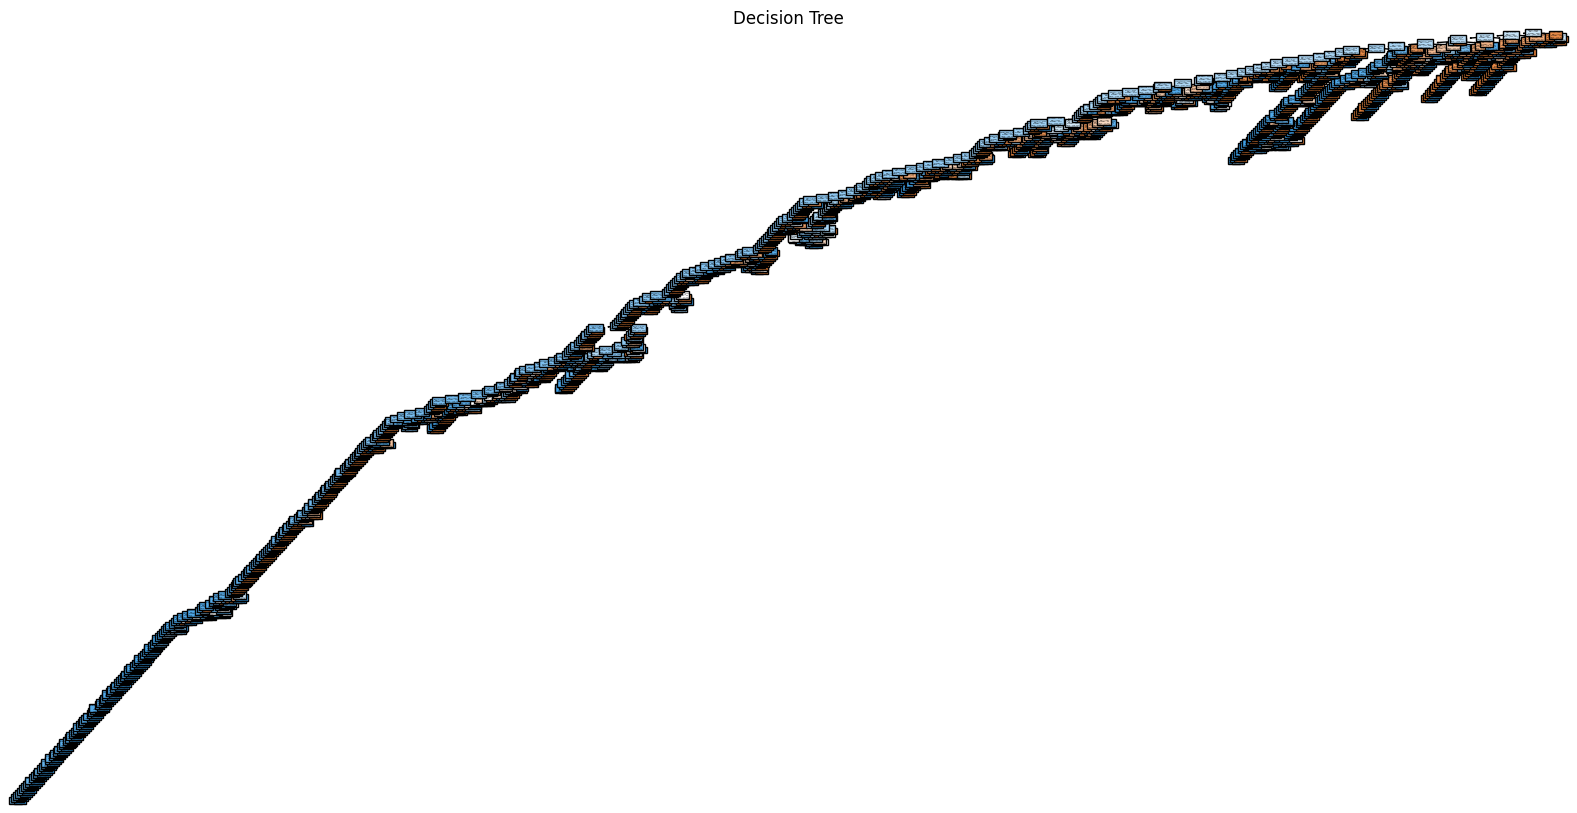

In [ ]:
import sys
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Set recursion limit to a higher value
sys.setrecursionlimit(10000)

# Initialize Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=0)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=cv.get_feature_names_out(), class_names=["Negative", "Positive"])
plt.title("Decision Tree")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix


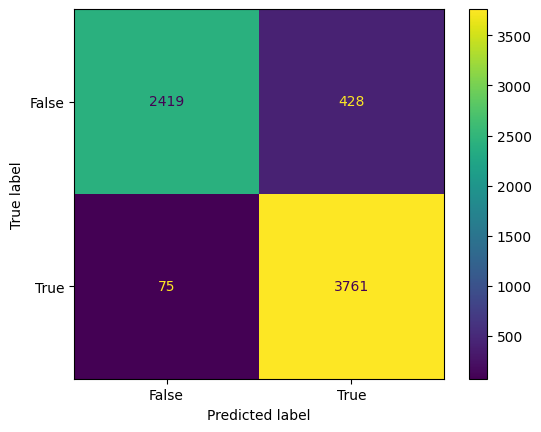

In [ ]:
from sklearn import metrics
cm = confusion_matrix(y_train,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()



SVM Accuracy: 0.73
SVM Error Rate: 0.27


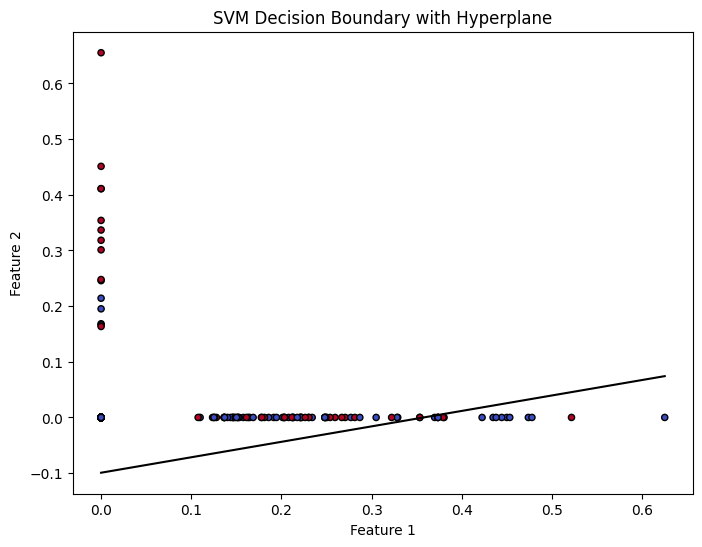

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Create a new SVM model
svm_model = SVC(kernel='linear')

# Train the model using the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
svm_predictions = svm_model.predict(X_test)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Calculate error rate
svm_error_rate = 1 - svm_accuracy

# Print the accuracy and error rate
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"SVM Error Rate: {svm_error_rate:.2f}")

# Plotting the SVM decision boundary
plt.figure(figsize=(8, 6))

# Plot the training data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Get the separating hyperplane
w = svm_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X_train[:, 0].min(), X_train[:, 0].max())
yy = a * xx - (svm_model.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy, 'k-')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Hyperplane')
plt.show()


Logistic Regression Accuracy: 0.73
Logistic Regression Error Rate: 0.27


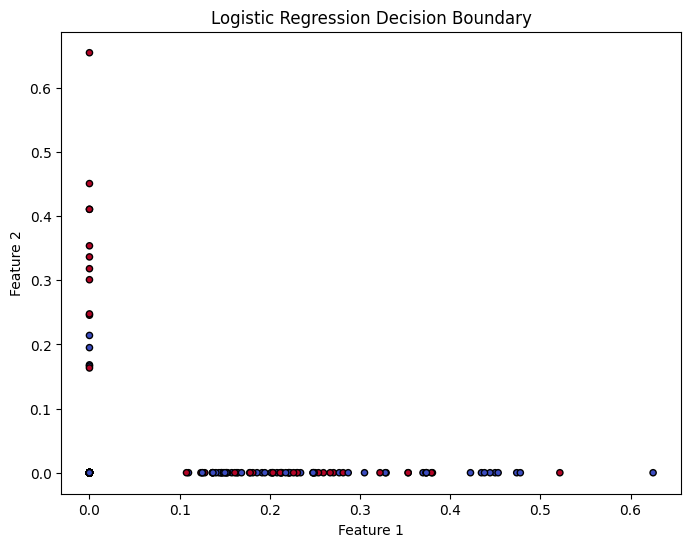

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Create a new Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model using the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the test data
log_reg_predictions = log_reg_model.predict(X_test)

# Evaluate the accuracy of the model
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

# Calculate error rate
log_reg_error_rate = 1 - log_reg_accuracy

# Print the accuracy and error rate
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")
print(f"Logistic Regression Error Rate: {log_reg_error_rate:.2f}")

# Plotting the decision boundary for Logistic Regression
plt.figure(figsize=(8, 6))

# Plot the training data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Create a meshgrid of points covering the feature space
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

#add code for decision boundary plot

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()


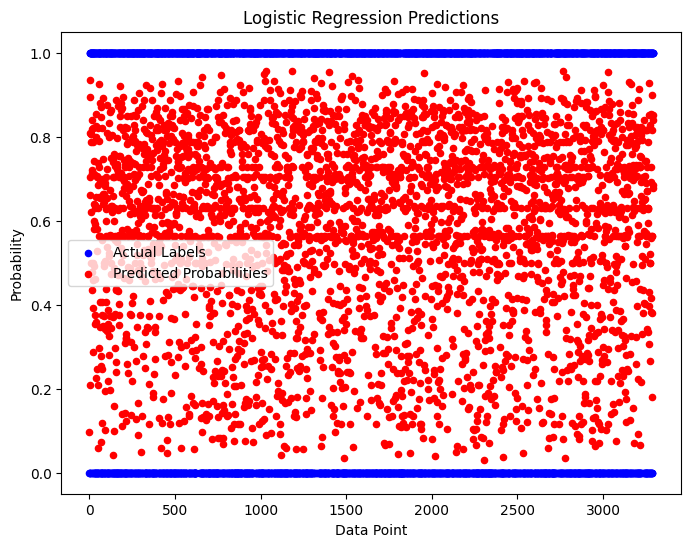

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test data
log_reg_probabilities = log_reg_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Plotting the Logistic Regression predictions
plt.figure(figsize=(8, 6))

# Scatter plot of actual labels vs. predicted probabilities
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual Labels', s=20)
plt.scatter(np.arange(len(log_reg_probabilities)), log_reg_probabilities, color='red', label='Predicted Probabilities', s=20)

plt.xlabel('Data Point')
plt.ylabel('Probability')
plt.title('Logistic Regression Predictions')
plt.legend()
plt.show()


Naive Bayes Accuracy: 0.67
Naive Bayes Error Rate: 0.33


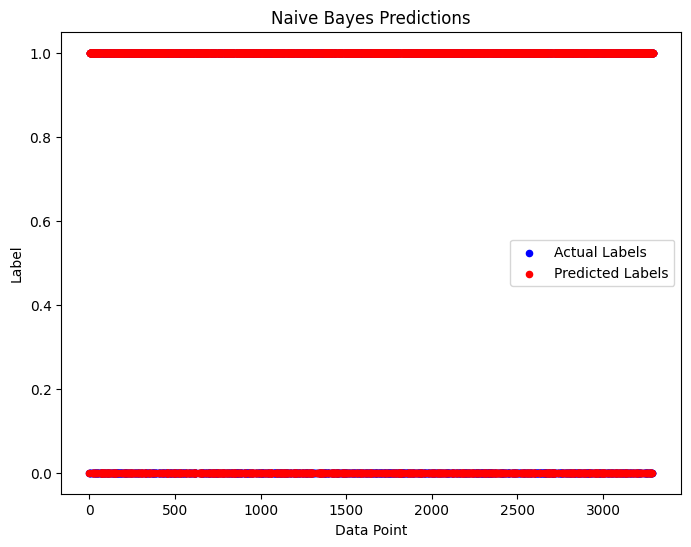

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Create a new Naive Bayes model (Gaussian)
naive_bayes_model = GaussianNB()

# Train the model using the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# Evaluate the accuracy of the model
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)

# Calculate error rate
naive_bayes_error_rate = 1 - naive_bayes_accuracy

# Print the accuracy and error rate
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy:.2f}")
print(f"Naive Bayes Error Rate: {naive_bayes_error_rate:.2f}")

# Plotting the Naive Bayes predictions
plt.figure(figsize=(8, 6))

# Scatter plot of data points with actual labels
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual Labels', s=20)

# Scatter plot of data points with predicted labels
plt.scatter(np.arange(len(naive_bayes_predictions)), naive_bayes_predictions, color='red', label='Predicted Labels', s=20)

plt.xlabel('Data Point')
plt.ylabel('Label')
plt.title('Naive Bayes Predictions')
plt.legend()
plt.show()


Accuracy: 0.8982965931863728
Error Rate: 0.10170340681362722


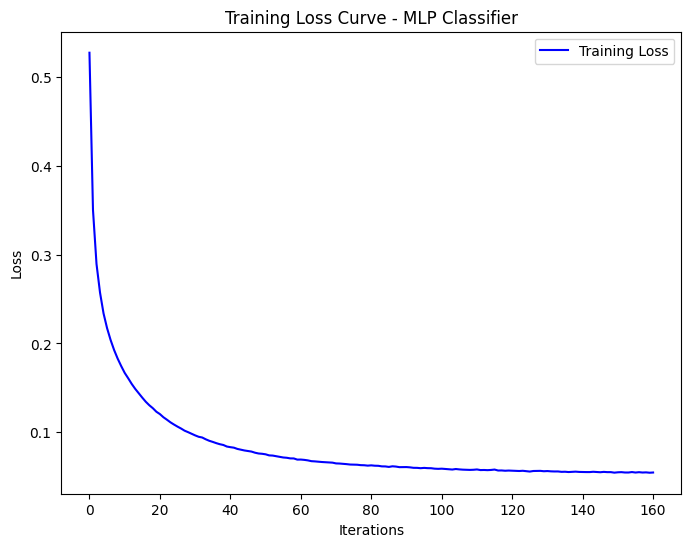

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/flipkart_data.csv')

# Create a sentiment column based on the rating
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')

# Vectorize the text data
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['review'])
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp_classifier.predict(X_test)

# Calculate accuracy and error rate
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")

# Plot the training loss curve
train_loss = mlp_classifier.loss_curve_
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve - MLP Classifier')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE values:
Logistic Regression: 0.8351703406813628
Support Vector Machine: 0.9038076152304609
Decision Tree: 1.062625250501002
Naive Bayes: 1.031062124248497
Multi-Layer Perceptron: 0.905811623246493

MAE values:
Logistic Regression: 0.47344689378757515
Support Vector Machine: 0.4939879759519038
Decision Tree: 0.564629258517034
Naive Bayes: 0.5170340681362725
Multi-Layer Perceptron: 0.5150300601202404

R2 Score values:
Logistic Regression: 0.3871236606525311
Support Vector Machine: 0.33675529923045355
Decision Tree: 0.22020952864068288
Naive Bayes: 0.24337162184937544
Multi-Layer Perceptron: 0.3352846901378381


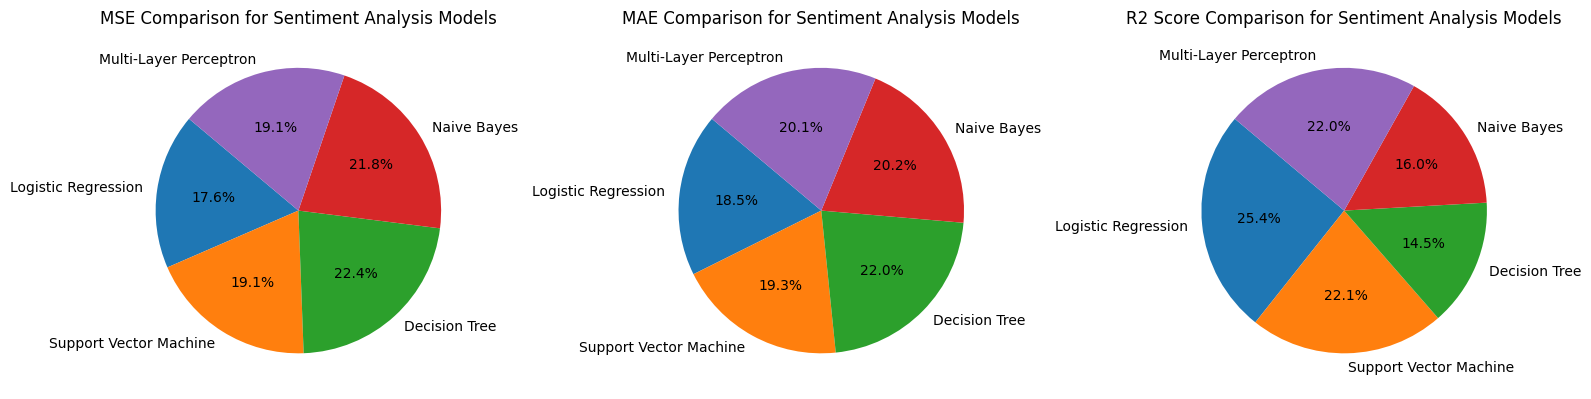

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('flipkart_data.csv')

# Assuming the actual column name for review text is 'review' instead of 'Text'
# Update the code accordingly

# Preprocess the data
# Assuming you have a column 'review' containing the review text and 'rating' containing sentiment labels
# Clean text, encode sentiment labels (e.g., Positive as 1, Negative as 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['rating'], test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer (you can use other vectorization methods as well)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train multiple classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Multi-Layer Perceptron': MLPClassifier()
}

# Initialize dictionaries to store metrics
mse_values = {}
mae_values = {}
r2_values = {}

for model_name, model in models.items():
    model.fit(X_train_vectorized, y_train)
    y_pred = model.predict(X_test_vectorized)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_values[model_name] = mse
    mae_values[model_name] = mae
    r2_values[model_name] = r2

# Print the metrics for each model
print("MSE values:")
for model_name, mse in mse_values.items():
    print(f"{model_name}: {mse}")

print("\nMAE values:")
for model_name, mae in mae_values.items():
    print(f"{model_name}: {mae}")

print("\nR2 Score values:")
for model_name, r2 in r2_values.items():
    print(f"{model_name}: {r2}")

# Plot the MSE values in a pie chart
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.pie(mse_values.values(), labels=mse_values.keys(), autopct='%1.1f%%', startangle=140)
plt.title('MSE Comparison for Sentiment Analysis Models')

# Plot the MAE values in a pie chart
plt.subplot(1, 3, 2)
plt.pie(mae_values.values(), labels=mae_values.keys(), autopct='%1.1f%%', startangle=140)
plt.title('MAE Comparison for Sentiment Analysis Models')

# Plot the R2 Score values in a pie chart
plt.subplot(1, 3, 3)
plt.pie(r2_values.values(), labels=r2_values.keys(), autopct='%1.1f%%', startangle=140)
plt.title('R2 Score Comparison for Sentiment Analysis Models')

plt.tight_layout()
plt.show()


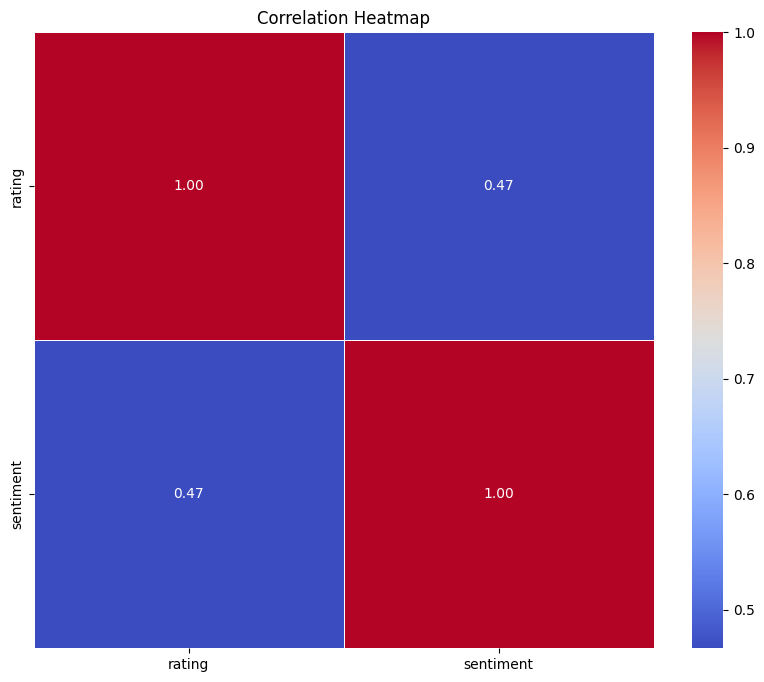

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

data = pd.read_csv('flipkart_data.csv')


# Convert data to DataFrame
df = pd.DataFrame(data)

# Perform sentiment analysis using TextBlob
df['sentiment'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate correlation matrix
corr_matrix = df[['rating', 'sentiment']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.75      0.58      0.66       356
    positive       0.91      0.96      0.94      1640

    accuracy                           0.89      1996
   macro avg       0.83      0.77      0.80      1996
weighted avg       0.89      0.89      0.89      1996

Classification Report for SVM:
              precision    recall  f1-score   support

    negative       0.72      0.60      0.66       356
    positive       0.92      0.95      0.93      1640

    accuracy                           0.89      1996
   macro avg       0.82      0.78      0.80      1996
weighted avg       0.88      0.89      0.88      1996

Classification Report for Decision Tree:
              precision    recall  f1-score   support

    negative       0.62      0.61      0.61       356
    positive       0.92      0.92      0.92      1640

    accuracy                           0.86      1996
   macro 

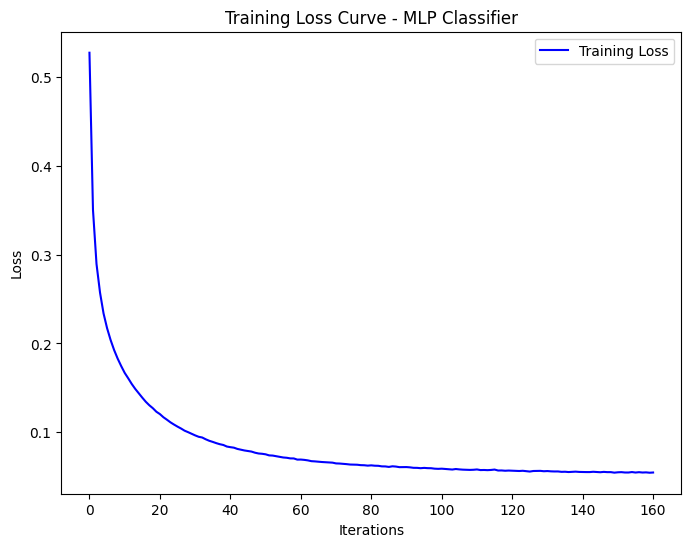

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/flipkart_data.csv')

# Create a sentiment column based on the rating
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')

# Vectorize the text data
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['review'])
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifiers
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

decision_tree_model = DecisionTreeClassifier(random_state=0)
decision_tree_model.fit(X_train, y_train)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train.toarray(), y_train)  # Naive Bayes requires dense arrays

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test data
log_reg_predictions = log_reg_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
naive_bayes_predictions = naive_bayes_model.predict(X_test.toarray())  # Convert to dense array for Naive Bayes
mlp_predictions = mlp_classifier.predict(X_test)

# Generate and print the classification report for each classifier
classifiers = {
    'Logistic Regression': log_reg_predictions,
    'SVM': svm_predictions,
    'Decision Tree': decision_tree_predictions,
    'Naive Bayes': naive_bayes_predictions,
    'MLP Classifier': mlp_predictions
}

for clf_name, predictions in classifiers.items():
    class_report = classification_report(y_test, predictions)
    print(f"Classification Report for {clf_name}:")
    print(class_report)
    print("="*50)

# Plot the training loss curve for MLP Classifier
train_loss = mlp_classifier.loss_curve_
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve - MLP Classifier')
plt.legend()
plt.show()


Accuracy: 0.6022044088176353
Error Rate: 0.39779559118236474


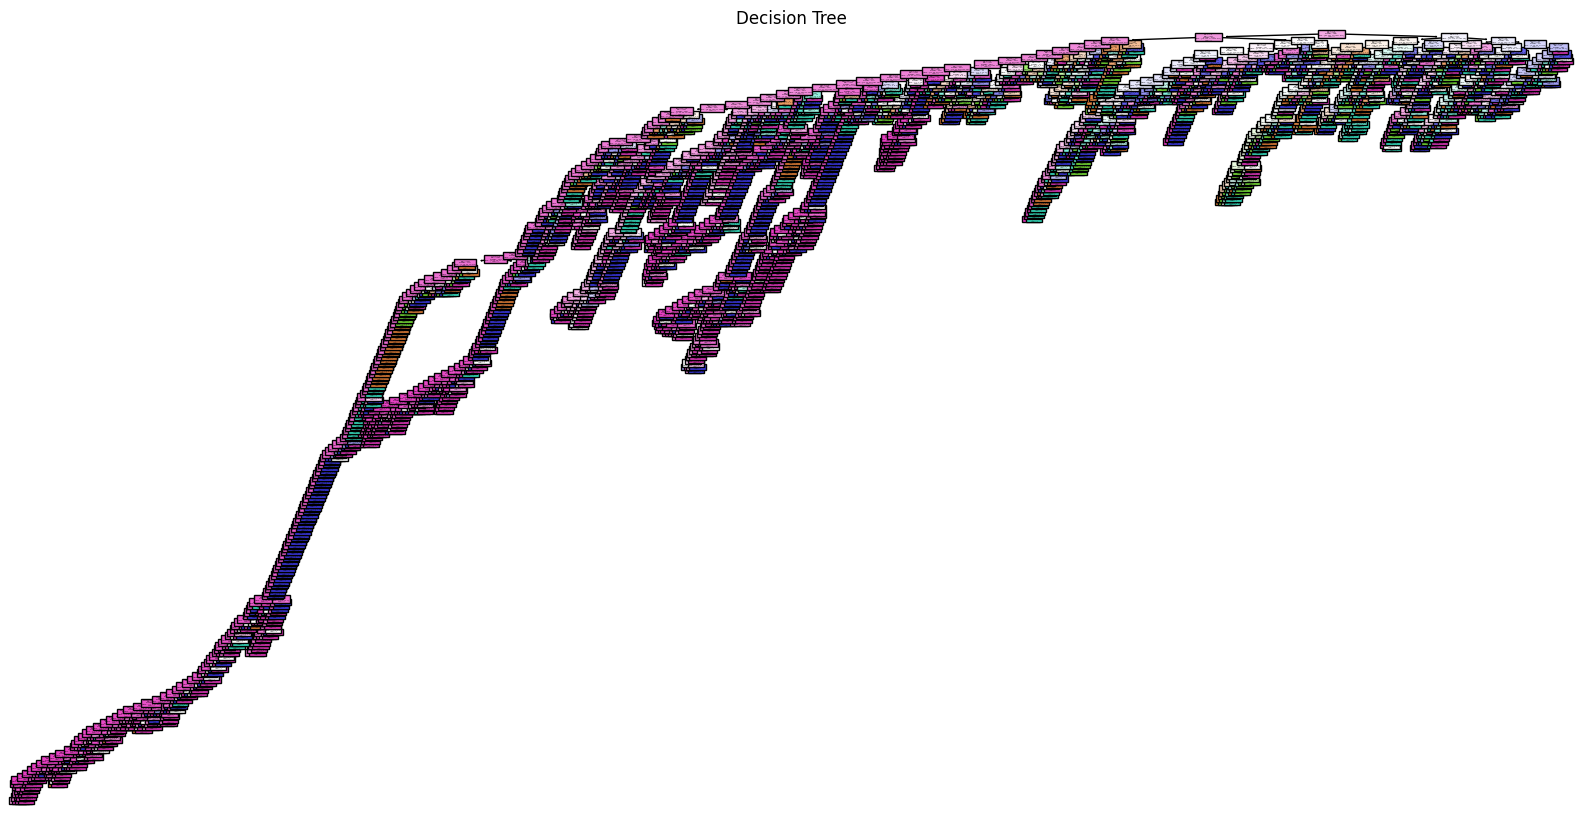

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load your dataset (replace 'path_to_your_dataset.csv' with the actual file path)
data = pd.read_csv('flipkart_data.csv')

# Assuming your dataset has 'review' column for text and 'rating' column for sentiment label
X = data['review']
y = data['rating']

# Get unique classes in your dataset as strings
unique_classes = sorted(y.unique(), key=str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=0)

# Train the model
decision_tree_model.fit(X_train_vec, y_train)

# Predict sentiment labels on the test data
y_pred = decision_tree_model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate error rate
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate}")

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=[str(c) for c in unique_classes])
plt.title("Decision Tree")
plt.show()
